In [68]:
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [69]:
#그래프 출력 조건

# minus font 
mpl.rcParams['axes.unicode_minus'] = False

# customize matplitlib
plt.rcParams["figure.figsize"] = (25,10)
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['font.size'] = 12

In [70]:
df = pd.read_csv('D:/경기대/2학년_2학기/dna 동아리/23_겨울방학프로젝트/전처리csv/worldcup_passing.csv', encoding='utf-')
df = df.drop(columns=['Unnamed: 0','passes_total_distance', 'passes_progressive_distance'], axis=1) #패스 거리를 나타내는 변수 역시 삭제

df.head(3)

,player,position,team,age,birth_year,minutes,passes_completed,passes,passes_completed_short,passes_short,passes_completed_medium,passes_medium,passes_completed_long,passes_long,assists,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
0,Aaron Mooy,MF,Australia,32,1990,360.0,170.0,217.0,78.0,90.0,59.0,73.0,18.0,31.0,0,1.0,22.0,1.0,0.0,14.0
1,Aaron Ramsey,MF,Wales,31,1990,270.0,88.0,112.0,37.0,41.0,27.0,35.0,18.0,23.0,0,1.0,7.0,1.0,0.0,5.0
2,Abdelhamid Sabiri,MF,Morocco,26,1996,180.0,45.0,58.0,30.0,33.0,7.0,13.0,7.0,10.0,1,3.0,3.0,0.0,0.0,0.0


In [71]:
df.iloc[:,6:].columns

Index(['passes_completed', 'passes', 'passes_completed_short', 'passes_short',
       'passes_completed_medium', 'passes_medium', 'passes_completed_long',
       'passes_long', 'assists', 'assisted_shots', 'passes_into_final_third',
       'passes_into_penalty_area', 'crosses_into_penalty_area',
       'progressive_passes'],
      dtype='object')

## PCA

### 1. 표준화

#### pass_관련 변수만 가진 데이터프레임 생성

In [71]:
df1 = df.iloc[:,6:]
df1 = df1.filter(like='passes')

df1.head(2)

,passes_completed,passes,passes_completed_short,passes_short,passes_completed_medium,passes_medium,passes_completed_long,passes_long,passes_into_final_third,passes_into_penalty_area,progressive_passes
0,170.0,217.0,78.0,90.0,59.0,73.0,18.0,31.0,22.0,1.0,14.0
1,88.0,112.0,37.0,41.0,27.0,35.0,18.0,23.0,7.0,1.0,5.0


In [72]:
# 열별로 scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns, index = df1.index)

In [7]:
df_scale.head(3)

,passes_completed,passes,passes_completed_short,passes_short,passes_completed_medium,passes_medium,passes_completed_long,passes_long,passes_into_final_third,passes_into_penalty_area,progressive_passes
0,0.264798,0.314949,0.277580,0.294118,0.141827,0.167816,0.327273,0.269565,0.309859,0.055556,0.229508
1,0.137072,0.162554,0.131673,0.133987,0.064904,0.080460,0.327273,0.200000,0.098592,0.055556,0.081967
2,0.070093,0.084180,0.106762,0.107843,0.016827,0.029885,0.127273,0.086957,0.042254,0.000000,0.000000


<AxesSubplot:title={'center':'pass_type'}>

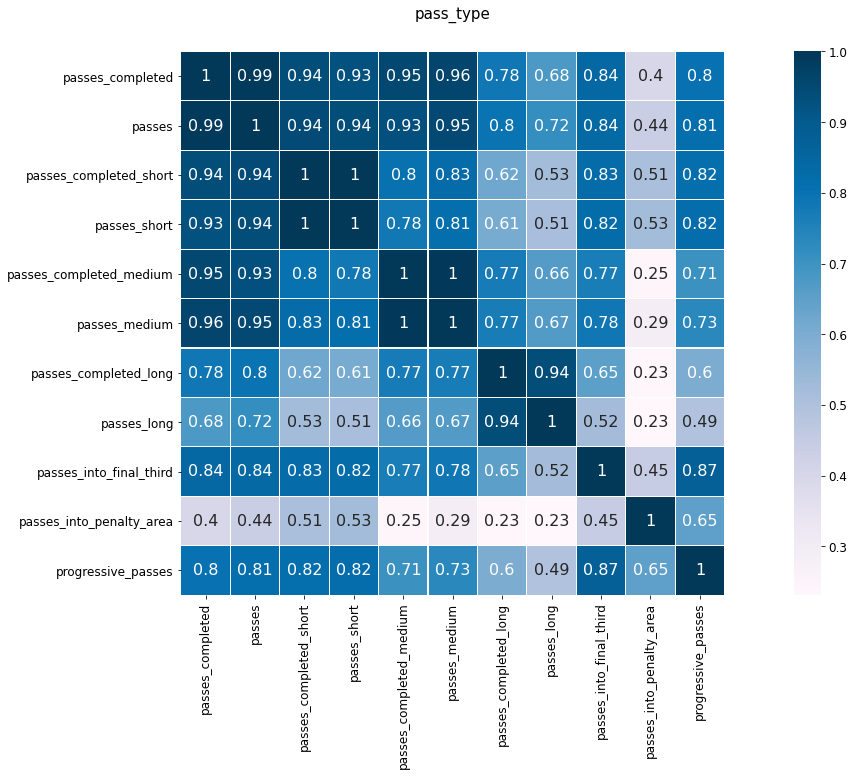

In [98]:
# 산점도 행렬 확인
colormap = plt.cm.PuBu
plt.title("pass_type", y = 1.05, size = 15)
sns.heatmap(df_scale.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

#### 패스 시도와 패스 성공 변수들 간에는 높은 상관을 가지고 있음 -> 일단 빼자

### 2. 표준화된 데이터를 통해 주성분 분석 실시

In [73]:
# 고윳값을 기준으로 설명할 수 있는 분산량
pca = PCA(n_components=2) #주성분은 2개로 해야 2차원 산점도로 표현 쉬움
printcipalComponents = pca.fit_transform(df_scale)

principalDf = pd.DataFrame(data=printcipalComponents, columns = ['pca1', 'pca2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [74]:
principalDf.head(3)

,pca1,pca2
0,0.449620,0.011830
1,0.094316,0.147720
2,-0.153590,0.041383


In [75]:
#고윳값 (설명력)
print('주성분의 설명력:', pca.explained_variance_ratio_)
print('전체 분산에 대한 설명력:',sum(pca.explained_variance_ratio_))

주성분의 설명력: [0.76866421 0.12411975]
전체 분산에 대한 설명력: 0.8927839562118615


In [76]:
#고유벡터 (eigenvector)
print('pca1의 고유벡터:', np.round(pca.components_[0],3), sep = '\n')
print('                                    ')
print('pca2의 고유벡터', np.round(pca.components_[1],3) , sep= '\n')

pca1의 고유벡터:
[0.349 0.373 0.346 0.34  0.244 0.254 0.397 0.294 0.255 0.136 0.227]
                                    
pca2의 고유벡터
[-0.071 -0.065 -0.306 -0.32   0.038  0.014  0.562  0.544 -0.153 -0.337
 -0.207]


In [77]:
a = np.round(pca.components_[0],3)
a = a.tolist()
b = np.round(pca.components_[1],3)
b = b.tolist()

In [78]:
pca_data = {'pca1' : a, 'pca2' : b}
df_pca = pd.DataFrame(pca_data, index= df_scale.columns)
df_pca

,pca1,pca2
passes_completed,0.349,-0.071
passes,0.373,-0.065
passes_completed_short,0.346,-0.306
passes_short,0.340,-0.320
passes_completed_medium,0.244,0.038
passes_medium,0.254,0.014
passes_completed_long,0.397,0.562
passes_long,0.294,0.544
passes_into_final_third,0.255,-0.153
passes_into_penalty_area,0.136,-0.337


#### pca1 주성분 설명: 모든 변수가 양의 값이면서 고르게 분포되어 있음 -> pca1값이 클수록 패스 자체를 많이한 선수
#### pca2 주성분 설명: 0,1,2,3,8,9,10 변수가 음수값이면서 2,3,9 변수가 유의하게 큰 음의 값 
#### 또한, 6,7변수가 유의하게 큰 양의 값을 가짐. 
#### 따라서 pca2값이 클수록 롱 패스에 대한 횟수 및 성공이 많은 선수 

In [79]:
#범주형 변수를 가진 df와 병합
    
df_info = df.iloc[:,0:6]
result = pd.concat([df_info, principalDf], axis=1)
result

,player,position,team,age,birth_year,minutes,pca1,pca2
0,Aaron Mooy,MF,Australia,32,1990,360.0,0.449620,0.011830
1,Aaron Ramsey,MF,Wales,31,1990,270.0,0.094316,0.147720
2,Abdelhamid Sabiri,MF,Morocco,26,1996,180.0,-0.153590,0.041383
3,Abdelkarim Hassan,DF,Qatar,29,1993,270.0,0.290735,0.160152
4,Abderrazak Hamdallah,FW,Morocco,32,1990,72.0,-0.344622,-0.015782
...,...,...,...,...,...,...,...,...
672,Ángel Di María,MF,Argentina,34,1988,288.0,0.299973,-0.238345
673,Ángelo Preciado,DF,Ecuador,24,1998,261.0,0.108613,-0.105214
674,Éder Militão,DF,Brazil,24,1998,351.0,0.661972,-0.017991
675,Óscar Duarte,DF,Costa Rica,33,1989,270.0,-0.044345,0.189193


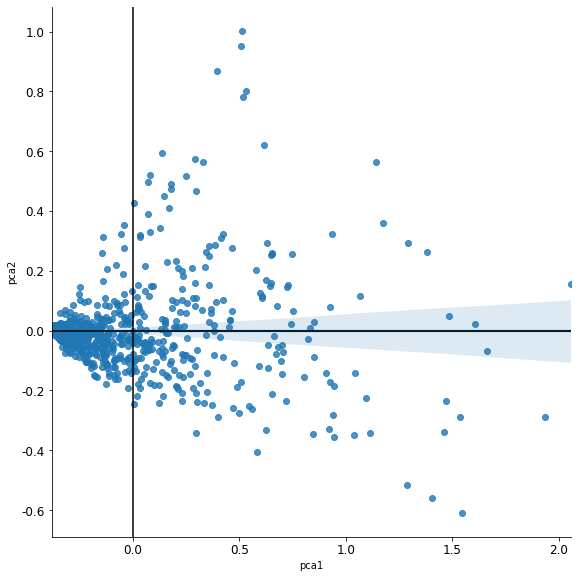

In [80]:
sns.lmplot(x="pca1", y="pca2", height=8, data=result) #height는 이미지 사이즈
plt.axvline(x=0, color = 'black') 
plt.axhline(y=0, color = 'black')
plt.show()

In [101]:
result.sort_values(by='pca1',ascending=False).head(10)

,player,position,team,age,birth_year,minutes,pca1,pca2
547,Rodri,DF,Spain,26,1996,387.0,2.059111,0.156749
396,Luka Modrić,MF,Croatia,37,1985,657.0,1.934796,-0.288941
403,Marcelo Brozović,MF,Croatia,30,1992,549.0,1.663152,-0.068890
515,Pedri,MF,Spain,20,2002,360.0,1.608536,0.021233
549,Rodrigo De Paul,MF,Argentina,28,1994,603.0,1.545698,-0.608931
489,Nicolás Otamendi,DF,Argentina,34,1988,693.0,1.534482,-0.290025
324,Joško Gvardiol,DF,Croatia,20,2002,693.0,1.486738,0.048039
76,Aurélien Tchouaméni,MF,France,22,2000,621.0,1.468961,-0.234555
187,Enzo Fernández,MF,Argentina,21,2001,567.0,1.460238,-0.338241
421,Mateo Kovačić,MF,Croatia,28,1994,639.0,1.405386,-0.560994


In [102]:
result.sort_values(by='pca2',ascending=False).head(10)

,player,position,team,age,birth_year,minutes,pca1,pca2
424,Mathew Ryan,GK,Australia,30,1992,360.0,0.514709,1.002513
257,Hugo Lloris,GK,France,35,1986,567.0,0.508365,0.951665
646,Wojciech Szczęsny,GK,Poland,32,1990,360.0,0.394402,0.868019
655,Yassine Bounou,GK,Morocco,31,1991,567.0,0.531135,0.801635
53,Andries Noppert,GK,Netherlands,28,1994,477.0,0.516801,0.782065
170,Dominik Livaković,GK,Croatia,27,1995,693.0,0.614575,0.622322
354,Keylor Navas,GK,Costa Rica,36,1986,270.0,0.139208,0.593600
166,Diogo Costa,GK,Portugal,23,1999,450.0,0.293052,0.574025
157,Dayot Upamecano,DF,France,24,1998,477.0,1.142240,0.564192
184,Emiliano Martínez,GK,Argentina,30,1992,693.0,0.329497,0.563752


### 탐색적 실시를 통해 얻은 인사이트
#### 1. 시도 변수와 성공 변수 간에는 높은 상관을 가지고 있다 (예시: 롱패스 시도, 롱패스 성공)
#### 2. 차원축소를 했을 때, 출전 시간이 적은 선수가 여럿 분포하고 있기 때문에 pca 산점도가 한쪽에 치우쳐 있다
#### 실제로 두 개의 주성분을 내림차순해봤을 때, pca1은 미드필더에 대해, pca2는 골키퍼로 분류되고 있다
#### 3. 레이블값을 명확히 정해놓고 해야 할 것 같다. -> 즉, 차원축소의 목적을 명시적으로 둬야겠다

### 해결책
#### 1. 시도 혹은 성공 변수 중 하나만 사용
#### 2. 출전 시간이 적은 선수를 제외해야겠음
#### 3. 각 차원축소마다 목표를 설정 -> 패스 시도 관련 변수들만 이용 -> 패스 시도 관련 2개의 주성분을 통해 선수들의 특성을 분류
#### 즉, 포지션별로 봐야할 소요도 있다 

In [85]:
mf_result = result[result['position']=='MF']

In [89]:
mf_result.describe()

,age,birth_year,minutes,pca1,pca2
count,225.000000,225.000000,225.000000,225.000000,225.000000
mean,26.688889,1995.284444,173.480000,-0.001075,-0.044339
std,4.272118,4.276073,144.028769,0.421716,0.103219
min,18.000000,1983.000000,0.000000,-0.378221,-0.608931
25%,24.000000,1992.000000,54.000000,-0.294299,-0.078486
50%,27.000000,1995.000000,144.000000,-0.134222,-0.017890
75%,30.000000,1998.000000,270.000000,0.120553,0.004881
max,39.000000,2004.000000,657.000000,1.934796,0.257228


In [96]:
mf_result = result[result['minutes'] >= 144]

In [97]:
mf_result

,player,position,team,age,birth_year,minutes,pca1,pca2
0,Aaron Mooy,MF,Australia,32,1990,360.0,0.449620,0.011830
1,Aaron Ramsey,MF,Wales,31,1990,270.0,0.094316,0.147720
2,Abdelhamid Sabiri,MF,Morocco,26,1996,180.0,-0.153590,0.041383
3,Abdelkarim Hassan,DF,Qatar,29,1993,270.0,0.290735,0.160152
6,Abdou Diallo,DF,Senegal,26,1996,333.0,0.343173,0.262436
...,...,...,...,...,...,...,...,...
672,Ángel Di María,MF,Argentina,34,1988,288.0,0.299973,-0.238345
673,Ángelo Preciado,DF,Ecuador,24,1998,261.0,0.108613,-0.105214
674,Éder Militão,DF,Brazil,24,1998,351.0,0.661972,-0.017991
675,Óscar Duarte,DF,Costa Rica,33,1989,270.0,-0.044345,0.189193


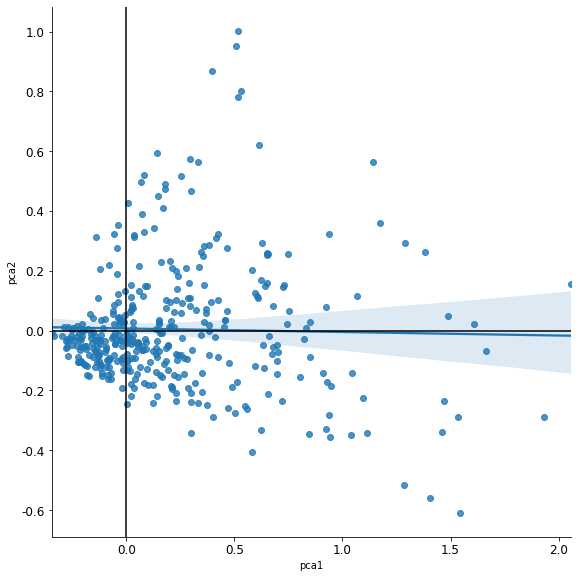

In [98]:
sns.lmplot(x="pca1", y="pca2", height=8, data=mf_result) #height는 이미지 사이즈
plt.axvline(x=0, color = 'black') 
plt.axhline(y=0, color = 'black')
plt.show()